In [21]:
num_prompts = [1, 2]

In [22]:
# Load in coverage data
import json

for num_prompt in num_prompts:
    with open(f'../scores/coverage_score_{num_prompt}.json', 'r') as file:
        globals()[f'coverage_score_{num_prompt}'] = {int(key): float(value) for key, value in json.load(file).items()}




In [23]:
# # Load scores_8
for num_prompt in num_prompts:
    globals()[f'x_vals_coverage_score_{num_prompt}'] = [key for key in globals()[f'coverage_score_{num_prompt}'].keys()]
    globals()[f'y_vals_coverage_score_{num_prompt}'] = [globals()[f'coverage_score_{num_prompt}'][key] for key in globals()[f'x_vals_coverage_score_{num_prompt}']]
    globals()[f'x_vals_majority_score_{num_prompt}'] = [key for key in globals()[f'majority_score_{num_prompt}'].keys()]
    globals()[f'y_vals_majority_score_{num_prompt}'] = [globals()[f'majority_score_{num_prompt}'][key] for key in globals()[f'x_vals_majority_score_{num_prompt}']]


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
# # Load scores_8
for num_prompt in num_prompts:
    globals()[f'x_new_coverage_score_{num_prompt}'] = np.linspace(min(globals()[f'x_vals_coverage_score_{num_prompt}']), max(globals()[f'x_vals_coverage_score_{num_prompt}']), 300)
    globals()[f'spl_coverage_score_{num_prompt}'] = make_interp_spline(globals()[f'x_vals_coverage_score_{num_prompt}'], globals()[f'y_vals_coverage_score_{num_prompt}'], k=3)
    globals()[f'y_smooth_coverage_score_{num_prompt}'] = globals()[f'spl_coverage_score_{num_prompt}'](globals()[f'x_new_coverage_score_{num_prompt}'])
    globals()[f'x_new_majority_score_{num_prompt}'] = np.linspace(min(globals()[f'x_vals_majority_score_{num_prompt}']), max(globals()[f'x_vals_majority_score_{num_prompt}']), 300)
    globals()[f'spl_majority_score_{num_prompt}'] = make_interp_spline(globals()[f'x_vals_majority_score_{num_prompt}'], globals()[f'y_vals_majority_score_{num_prompt}'], k=3)
    globals()[f'y_smooth_majority_score_{num_prompt}'] = globals()[f'spl_majority_score_{num_prompt}'](globals()[f'x_new_majority_score_{num_prompt}'])


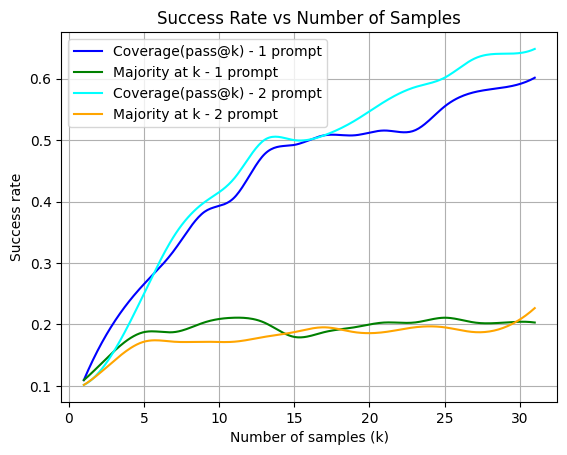

In [29]:
coverage_color_map = {
    1: 'blue',
    2: 'cyan',
    4: 'pink',
    8: 'purple',
    32: 'grey',
    64: 'yellow',  # Adding color for 64
    128: 'lightblue'  # Adding color for 128
}

majority_color_map = {
    1: 'green',
    2: 'orange',
    4: 'brown',
    8: 'red',
    32: 'black',
    64: 'magenta',  # Adding color for 64
    128: 'teal'  # Adding color for 128
}


for num_prompt in num_prompts:
    plt.plot(globals()[f'x_new_coverage_score_{num_prompt}'], globals()[f'y_smooth_coverage_score_{num_prompt}'], color=coverage_color_map[num_prompt], label=f'Coverage(pass@k) - {num_prompt} prompt')
    plt.plot(globals()[f'x_new_majority_score_{num_prompt}'], globals()[f'y_smooth_majority_score_{num_prompt}'], color=majority_color_map[num_prompt], label=f'Majority at k - {num_prompt} prompt')

# Adding annotations and labels
plt.xlabel('Number of samples (k)')
plt.ylabel('Success rate')
plt.title('Success Rate vs Number of Samples')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()